In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import scipy
import os

In [2]:
# project files

from utils.variables import pack, unpack
from utils.display import table, tabulate
from utils.files import download_sheet, save, load
from utils.hash import digest

from fit_options import fit_options
from utils.soft_round import soft_round, soft_floor

In [3]:
# stuff for display

from IPython.lib.pretty import pretty, pprint

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 120)

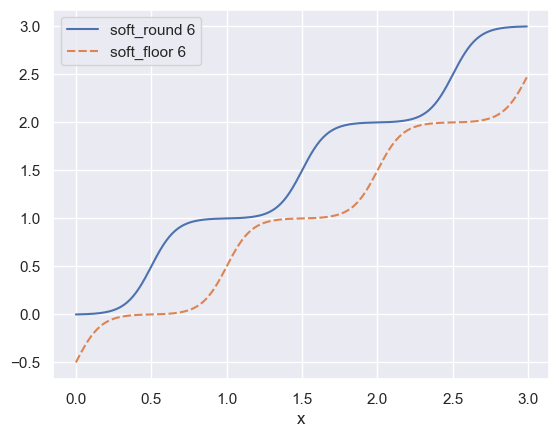

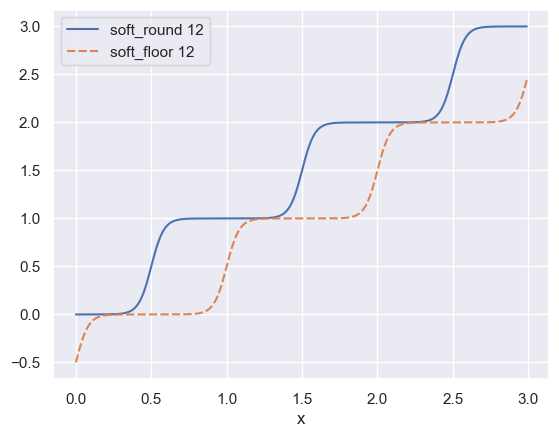

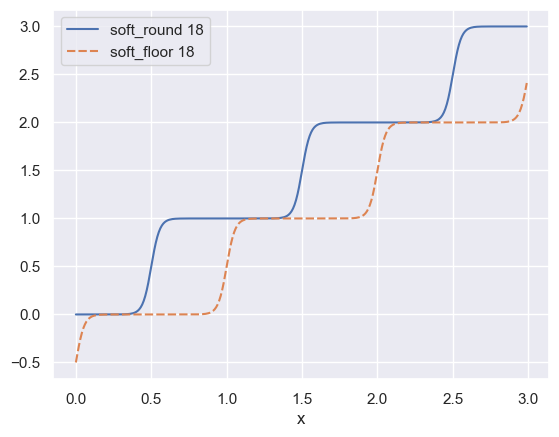

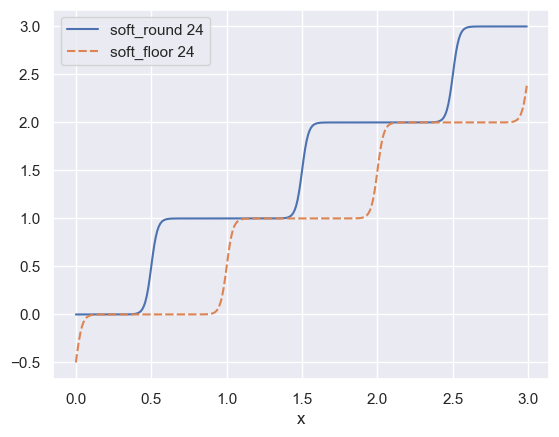

In [4]:
x = np.arange(0,3,0.01)

alphas = [6, 12, 18, 24]

for alpha in alphas:
    fit_options.soft_round.exact = False
    fit_options.soft_round.alpha = alpha
    data=pd.DataFrame({'x':x, f'soft_round {alpha}': soft_round(x), f'soft_floor {alpha}': soft_floor(x) }).set_index('x')

    f = plt.figure()
    g = sns.lineplot(data)
    plt.close()
    display(f)

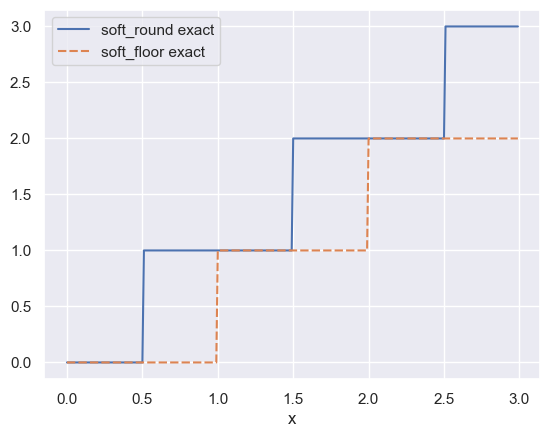

In [5]:
x = np.arange(0,3,0.01)
alpha = 'exact'
fit_options.soft_round.exact = True
data=pd.DataFrame({'x':x, f'soft_round {alpha}': soft_round(x), f'soft_floor {alpha}': soft_floor(x) }).set_index('x')
_ = sns.lineplot(data)

In [8]:
fit_options.soft_round.exact = False
fit_options.soft_round.alpha = 12
soft_floor(100*0.22)/100

0.2150000000000599